In [1]:
import pandas as pd
import os
file_name = "Stock_AnalysisQly_Details1.csv"
CSV_FILE = os.path.join(os.path.dirname(os.getcwd()), file_name)
print(CSV_FILE)
QSheet = pd.DataFrame.from_csv(CSV_FILE)

C:\Users\nandpara\PycharmProjects\Machine_Learning1\Stock_AnalysisQly_Details1.csv


c:\users\nandpara\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


# Declarations:

In [2]:
Stock_Feature = ['RQ_1_2_PAT_PChg','RQ_1_2_Operating_Profit_PChg','RQ_1_2_Total_Exp_PChg','RQ_1_2_Ebit_PChg','RQ_1_2_Ebitda_PChg']
Stock_value = ['RQ_1_2_Close_PChg']
OP = 'RQ_1_2_Operating_Profit_PChg'
PAT = 'RQ_1_2_PAT_PChg'
Close = 'RQ_1_2_Close_PChg'

# Imputer to Fill the NaN Values with Median of that column and Removing -inf and inf

In [3]:
from sklearn.preprocessing import Imputer
import numpy as np
imputer = Imputer(strategy="median")
imputer.fit(QSheet)
imputer.statistics_
X = imputer.transform(QSheet)
NQSheet = pd.DataFrame(X, index=QSheet.index,columns=QSheet.columns)
#imputer now fills only the NaN values , inf value is still untreated....
NQSheet = NQSheet.replace(to_replace=[np.inf, -np.inf], value=0)

# Removing Ouliers , 
 ## 1. Remove 5 % from Top and 5% from Bottom

In [4]:
FivePercent = int(len(NQSheet)*0.2)
OP_Top_Outliers = NQSheet[OP].sort_values()[:FivePercent].index
OP_Bottom_Outliers = NQSheet[OP].sort_values()[-FivePercent:].index
PAT_Top_Outliers = NQSheet[PAT].sort_values()[:FivePercent].index
PAT_Bottom_Outliers = NQSheet[PAT].sort_values()[-FivePercent:].index
Outliers = set(list(OP_Top_Outliers) + list(OP_Bottom_Outliers) + list(PAT_Top_Outliers) + list(PAT_Bottom_Outliers))
NQSheet_No_Outliers = NQSheet.drop(Outliers)
len(NQSheet_No_Outliers)

726

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB9CB0DF98>,
      dtype=object)

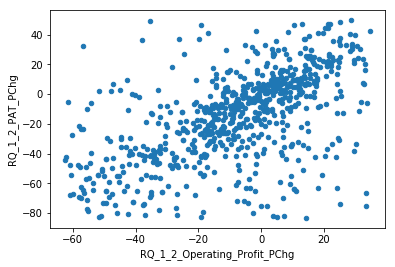

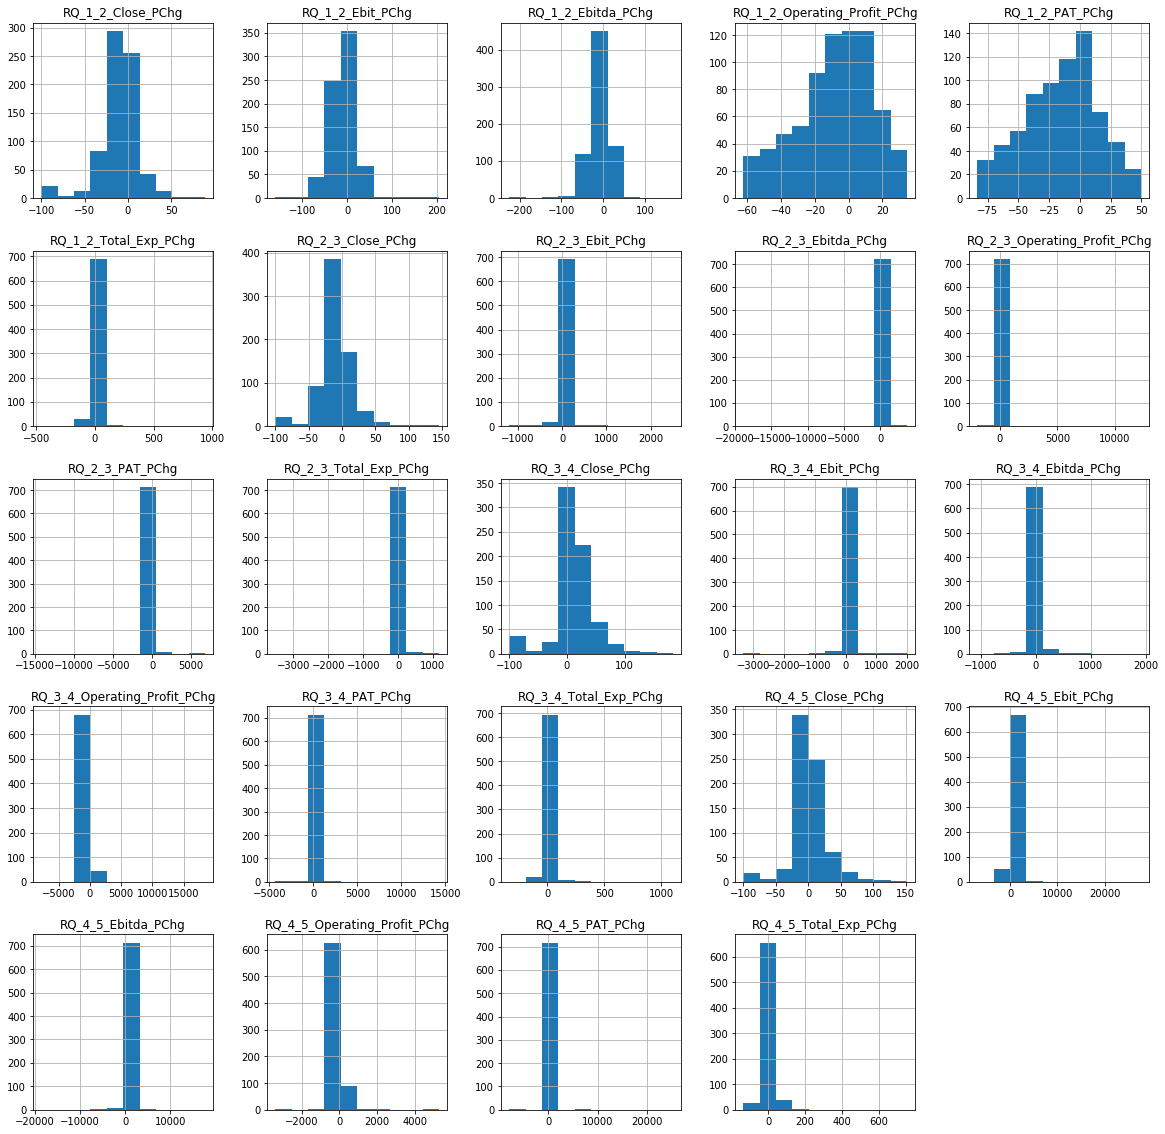

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
NQSheet_No_Outliers.plot(kind='scatter', x=OP, y=PAT)
NQSheet_No_Outliers.hist(figsize=(20, 20))

# Prediction after Removing Outliers, Shows good increase in accuracy but still worst

In [6]:
NQSheet_Corr = NQSheet_No_Outliers.filter(regex='RQ_3_4*').corr()
NQSheet_Corr['RQ_3_4_Close_PChg'].sort_values()

RQ_3_4_Operating_Profit_PChg   -0.053594
RQ_3_4_Total_Exp_PChg          -0.039147
RQ_3_4_Ebitda_PChg              0.018918
RQ_3_4_PAT_PChg                 0.020594
RQ_3_4_Ebit_PChg                0.107630
RQ_3_4_Close_PChg               1.000000
Name: RQ_3_4_Close_PChg, dtype: float64

In [7]:
Stock_Feature = ['RQ_1_2_PAT_PChg','RQ_1_2_Operating_Profit_PChg','RQ_1_2_Total_Exp_PChg','RQ_1_2_Ebit_PChg','RQ_1_2_Ebitda_PChg']
Stock_value = ['RQ_1_2_Close_PChg']

train_Feature = NQSheet_No_Outliers[Stock_Feature]
train_Value = NQSheet_No_Outliers[Stock_value]


from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train_Feature, train_Value)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(train_Feature, train_Value))

[-8.50852292]
[[ 1.42397941e-01  1.87536245e-01  1.09163044e-05 -2.97668877e-01
   7.02317888e-02]]
0.055173101080068454


In [8]:
from sklearn.tree import DecisionTreeRegressor
TreeReg = DecisionTreeRegressor()
TreeReg.fit(train_Feature, train_Value)
TreeReg.score(train_Feature, train_Value)


0.9912376514188616

# Normalisation , Scaling the feature values - Seems it does not change the Accracy but helps in Faster Converging to the Model Parameters 
    ## Standardisation - 
    ## Min-Max Scaling - 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ScaledQSheet = scaler.fit_transform(NQSheet_No_Outliers[Stock_Feature + Stock_value])
NQSheet_No_Outliers = pd.DataFrame(ScaledQSheet,index=NQSheet_No_Outliers.index, columns=[Stock_Feature + Stock_value])

In [10]:
train_Feature = NQSheet_No_Outliers[Stock_Feature]
train_Value = NQSheet_No_Outliers[Stock_value]

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train_Feature, train_Value)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(train_Feature, train_Value))


[3.21125667e-17]
[[ 1.84251446e-01  1.80187743e-01  2.23263647e-05 -3.73663805e-01
   8.42257855e-02]]
0.055173101080068454


# Shuffling the DataSet and Spilting Train and Test Dataset , Seems increasing the Score considerably 

In [11]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(NQSheet_No_Outliers, test_size=0.2 , random_state=42)

In [12]:
train_Feature = train_set[Stock_Feature]
train_Value = train_set[Stock_value]

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train_Feature, train_Value)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(train_Feature, train_Value))

[0.0150459]
[[ 0.22721619  0.16100916  0.00054693 -0.39012755  0.07829195]]
0.06830982963058552


In [13]:
from sklearn.tree import DecisionTreeRegressor
TreeReg = DecisionTreeRegressor()
TreeReg.fit(train_Feature, train_Value)
TreeReg.score(train_Feature, train_Value)

0.9951896561236727

In [14]:
Test_Feature = test_set[Stock_Feature]
Test_Value = test_set[Stock_value]

Predicted = TreeReg.predict(Test_Feature)
print(Test_Value)
print(Predicted)
from sklearn.metrics import mean_squared_error as mse 
MSE = mse(Test_Value, Predicted)
print(MSE)


           RQ_1_2_Close_PChg
DEEPAKNTR           0.370728
KIRLOSENG          -0.404036
PGHH                0.514564
HATHWAY            -0.212587
ABB                 0.054356
VINYLINDIA          0.630135
TNTELE             -0.061764
VINDHYATEL          0.325743
SQSBFSI             0.514198
MEGASOFT            0.441166
GSKCONS             0.727207
MCDHOLDING         -0.267352
TIMESGTY           -0.623408
PARACABLES          0.800460
KOKUYOCMLN         -0.406669
DIVISLAB            0.237098
MINDTREE            1.641714
BODALCHEM          -0.745540
FEDDERELEC          0.962902
CUB                 0.747436
PNCINFRA           -0.324535
INDOCO             -0.608851
RUSHIL             -0.503643
TPLPLASTEH         -1.283217
PPAP                0.636079
NILAINFRA          -0.739084
IPAPPM              0.796329
MUTHOOTCAP          2.087212
SALZERELEC          0.035919
MINDAIND            1.240331
...                      ...
MCX                 0.852711
WELSPUNIND          0.151503
SSWL          

# After Removing Outliers , Does Stratified Sampling Still Required ?

In [15]:
NQSheet_No_Outliers['PAT_CAT'] = np.ceil(NQSheet_No_Outliers['RQ_1_2_PAT_PChg']/0.5)


In [16]:
NQSheet_No_Outliers['PAT_CAT']

,PAT_CAT
KDDL,1.0
ERIS,3.0
SORILINFRA,-3.0
SOLARINDS,3.0
GEECEE,-2.0
RECLTD,-1.0
SUPREMEIND,1.0
LAOPALA,-1.0
ITDCEM,2.0
NESTLEIND,1.0


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit( n_splits = 1, test_size = 0.2,)

for train, test in split.split(NQSheet_No_Outliers, NQSheet_No_Outliers['PAT_CAT']):
    train_Set = NQSheet_No_Outliers.iloc[train]
    Test_Set = NQSheet_No_Outliers.iloc[test]

print(len(train_Set), len(Test_Set))



580 146


In [18]:
train_Feature = train_Set[Stock_Feature]
train_Value = train_Set[Stock_value]

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train_Feature, train_Value)
print(linear.intercept_)
print(linear.coef_)
print(linear.score(train_Feature, train_Value))

[0.01015462]
[[ 0.216821    0.1681901   0.00617971 -0.36344081  0.06774441]]
0.05025620805510511


In [19]:
linear.predict(train_Test)

NameError: name 'train_Test' is not defined

In [ ]:
from sklearn.tree import DecisionTreeRegressor
TreeReg = DecisionTreeRegressor()
TreeReg.fit(train_Feature, train_Value)
TreeReg.score(train_Feature, train_Value)

In [ ]:
Test_Feature = Test_Set[Stock_Feature]
Test_Value = Test_Set[Stock_value]

Predicted = TreeReg.predict(Test_Feature)

# DT_Fit = TreeReg.fit(Test_Feature, Test_Value)
# print(DT_Fit.score(Test_Feature, Test_Value))


In [ ]:
from sklearn.metrics import mean_squared_error as mse
print(mse(Test_Value, Predicted))
